## Customer Clustering

In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import pylab as pl
import pydot
import warnings
import seaborn as sns
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv"
travel = pd.read_csv(file_name)

In [3]:
travel.head(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83


In [4]:
travel.tail(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
99995,18926976,2013-03-31 16:45:01,2,3,66,351,21609,1386.4061,858268,0,...,0,1,762,6,0,1,2,50,503,91
99996,2700011,2013-09-29 14:09:07,2,3,66,462,49272,698.1395,957708,0,...,0,1,12843,5,0,1,2,50,661,6
99997,35620410,2014-07-11 22:05:54,37,1,69,998,52849,NaN,814512,1,...,0,3,18773,1,0,1,6,22,1794,38
99998,25735008,2013-07-02 01:03:12,2,3,66,246,28491,207.2549,881704,0,...,0,1,8859,1,0,1,2,50,212,89
99999,1792721,2014-12-19 19:59:12,11,3,205,354,53478,1198.4359,845482,0,...,1,1,11848,1,0,1,2,50,705,42


In [5]:
travel.shape

(100000, 25)

In [6]:
travel.columns

Index(['Unnamed: 0', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [7]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
Unnamed: 0                   100000 non-null int64
date_time                    100000 non-null object
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63915 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99878 non-null object
srch_co                      99878 non-null object
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id  

* Roughly 36% of the data from the 'orig_destination_distance' column is missing

In [8]:
pd.concat([travel.isnull().sum(), 100 * travel.isnull().sum()/len(travel)],
         axis=1).rename(columns={0: 'Missing Amount', 1: 'Percentage (%)'})

,Missing Amount,Percentage (%)
Unnamed: 0,0,0.000
date_time,0,0.000
site_name,0,0.000
posa_continent,0,0.000
user_location_country,0,0.000
user_location_region,0,0.000
user_location_city,0,0.000
orig_destination_distance,36085,36.085
user_id,0,0.000
is_mobile,0,0.000


In [9]:
travel.nunique()

Unnamed: 0                   100000
date_time                     99886
site_name                        41
posa_continent                    5
user_location_country           201
user_location_region            779
user_location_city            10779
orig_destination_distance     62206
user_id                       88863
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1066
srch_co                        1068
srch_adults_cnt                  10
srch_children_cnt                10
srch_rm_cnt                       9
srch_destination_id            8827
srch_destination_type_id          8
is_booking                        2
cnt                              32
hotel_continent                   7
hotel_country                   178
hotel_market                   1843
hotel_cluster                   100
dtype: int64

In [10]:
travel.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100000.0,1.882530e+07,1.086183e+07,1012.0000,9.448967e+06,1.881212e+07,2.825307e+07,3.767009e+07
site_name,100000.0,9.838570e+00,1.199643e+01,2.0000,2.000000e+00,2.000000e+00,1.500000e+01,5.300000e+01
posa_continent,100000.0,2.678150e+00,7.490181e-01,0.0000,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
user_location_country,100000.0,8.599507e+01,5.929200e+01,0.0000,6.600000e+01,6.600000e+01,7.000000e+01,2.390000e+02
user_location_region,100000.0,3.086370e+02,2.087066e+02,0.0000,1.740000e+02,3.140000e+02,3.850000e+02,1.025000e+03
user_location_city,100000.0,2.767639e+04,1.676865e+04,0.0000,1.294900e+04,2.765500e+04,4.232800e+04,5.650700e+04
orig_destination_distance,63915.0,1.960662e+03,2.228153e+03,0.0056,3.127921e+02,1.131835e+03,2.542359e+03,1.196538e+04
user_id,100000.0,6.054383e+05,3.516154e+05,14.0000,2.987962e+05,6.028825e+05,9.157222e+05,1.198783e+06
is_mobile,100000.0,1.337700e-01,3.404067e-01,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
is_package,100000.0,2.481400e-01,4.319357e-01,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [11]:
travel.describe(include = [np.object, pd.Categorical]).T

,count,unique,top,freq
date_time,100000,99886,2014-07-30 09:32:39,2
srch_ci,99878,1066,2014-12-26,600
srch_co,99878,1068,2015-01-02,579


In [12]:
corr = travel.corr()
corr

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,-0.006413,-0.000838,...,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,...,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,...,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,...,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,...,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,...,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,...,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,...,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.006413,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,...,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,-0.000838,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,...,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399


Text(0.5, 1, 'Heatmap of Correlation Matrix')

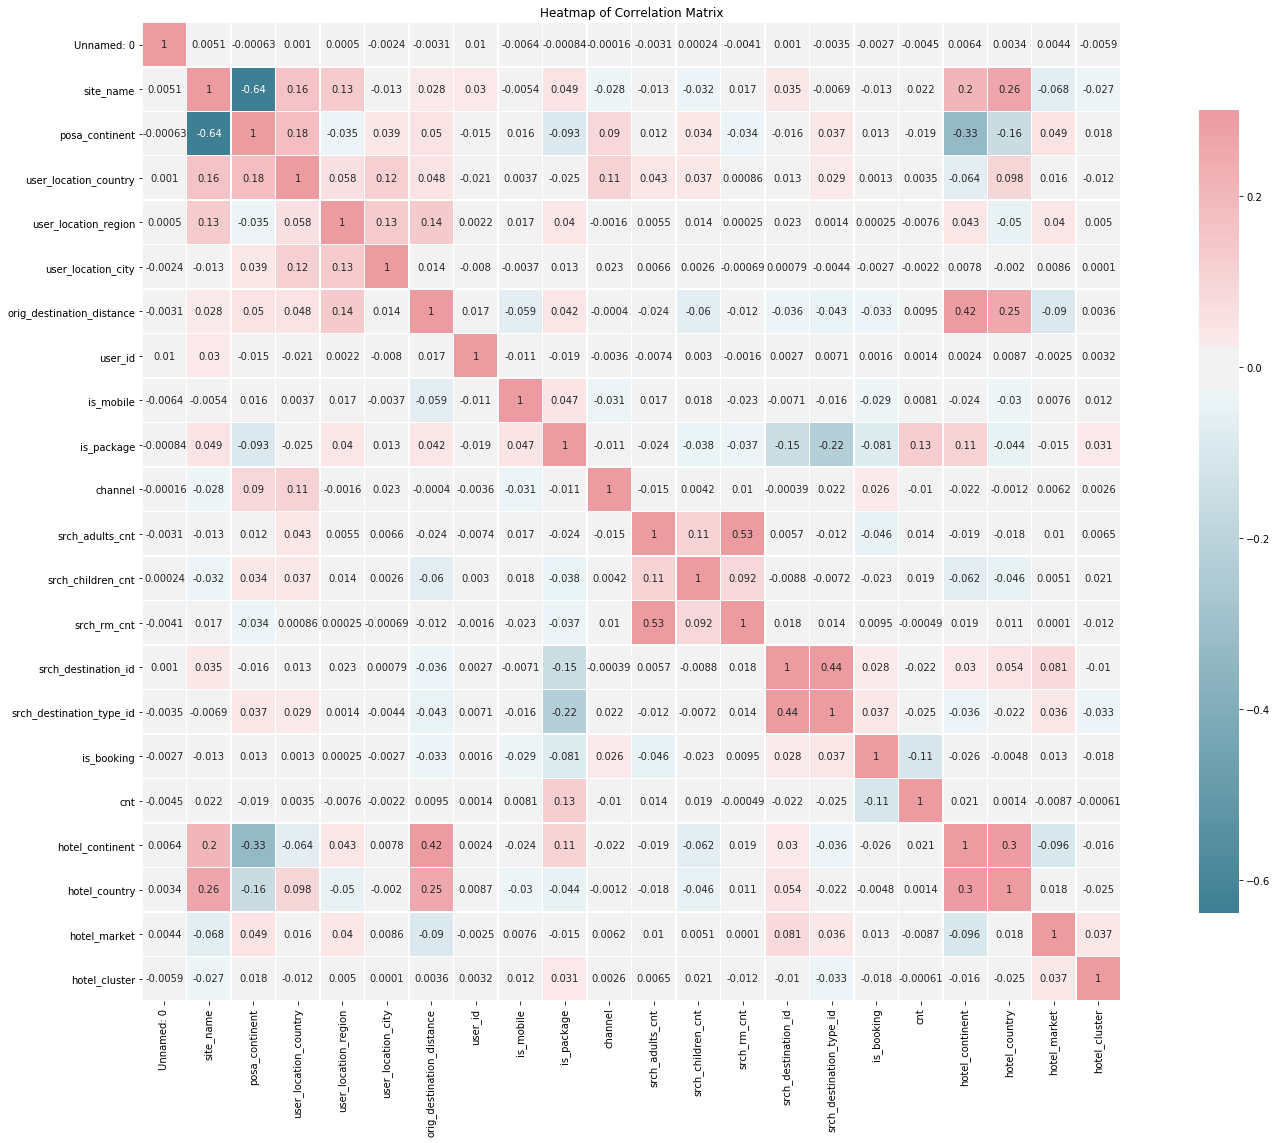

In [13]:
plt.figure(figsize = (28,18))

cmap = sns.diverging_palette(220,10,as_cmap = True)

sns.heatmap(corr,xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,annot=True, cmap=cmap,vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [14]:
travel.groupby('user_id')['is_booking'].agg({'num_of_bookings':'count'}).reset_index().groupby('num_of_bookings')['user_id'].agg('count')

num_of_bookings
1    79189
2     8423
3     1065
4      161
5       24
6        1
Name: user_id, dtype: int64

### Viewing the bookings made per user

In [15]:
booking_count_per_user = travel.groupby('user_id')['is_booking'].agg(['count']).reset_index()

In [16]:
booking_count_per_user.head()

,user_id,count
0,14,1
1,38,1
2,40,1
3,156,2
4,160,1


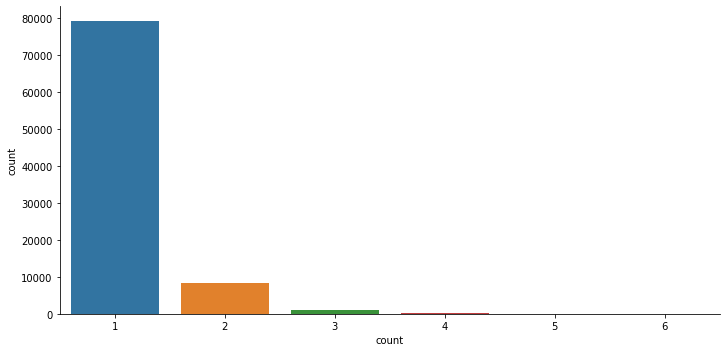

In [18]:
sns.factorplot('count', data = booking_count_per_user, kind = 'count', aspect = 2.0)

In [19]:
travel.groupby('user_id')['is_booking'].agg(['count']).head()

,count
user_id,
14,1
38,1
40,1
156,2
160,1


In [20]:
travel = travel.merge(travel.groupby('user_id')['is_booking'].agg(['count']).reset_index())
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2


In [21]:
pd.crosstab(travel['srch_adults_cnt'], travel['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,174,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


* Summing the counts of travellers and dropping rows that area equal to zero

In [22]:
travel.drop(travel[travel['srch_adults_cnt'] + travel['srch_children_cnt']==0].index).head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2


* Changing the column type to datetime


* Changing the timestamp to date time

In [23]:
travel['srch_co'] = pd.to_datetime(travel['srch_co'])
travel['srch_ci'] = pd.to_datetime(travel['srch_ci'])
travel['date_time'] = pd.to_datetime(travel['date_time'])

travel['date'] = pd.to_datetime(travel['date_time'].apply(lambda x: x.date()))

In [24]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,8286,1,0,1,0,63,1258,68,2,2014-11-03
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,8286,1,0,1,0,63,1258,14,2,2014-07-28
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1842,3,0,1,2,198,786,37,1,2013-03-13
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,8746,1,0,1,6,105,29,22,1,2014-10-13
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,6210,3,1,1,2,198,1234,42,2,2013-11-05


* Check-in date needs to be later than booking date


* Check-out date needs to be later than check-in date

In [25]:
travel[travel['srch_co'] < travel['srch_ci']][['srch_co', 'srch_ci']]
travel[travel['srch_ci'] < travel['date']][['srch_ci', 'date']]

,srch_ci,date
7138,2014-01-05,2014-01-07
14931,2014-10-13,2014-10-14
18778,2014-06-11,2014-11-10
22722,2014-02-11,2014-10-09
25886,2014-03-10,2014-09-15
26795,2014-09-12,2014-12-02
29591,2014-08-02,2014-08-23
33886,2013-01-16,2013-01-17
33887,2014-03-03,2014-03-04
33888,2013-01-21,2013-01-22


### Feature Engineering

In [26]:
def duration(row):
    '''Gives the duration of trip by taking the row as an input and finding the time (in days) beween checkin and checkout'''
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    '''Gives the days the trip was booked in advance'''
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

travel['duration'] = travel.apply(duration, axis=1)

travel['days_in_advance'] = travel.apply(days_in_advance, axis=1)

In [27]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date,duration,days_in_advance
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,0,63,1258,68,2,2014-11-03,4.0,42.0
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,0,1,0,63,1258,14,2,2014-07-28,5.0,29.0
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,2,198,786,37,1,2013-03-13,1.0,0.0
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,6,105,29,22,1,2014-10-13,7.0,172.0
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,1,2,198,1234,42,2,2013-11-05,1.0,2.0


### Statistical Analysis of Booking Channels

* Checking each channel by seeing the booking rate for each channel type booking rate per channel

In [28]:
travel.groupby('channel')['is_booking'].agg({'booking_rate': 'mean', 'num_of_bookings': 'count'}).reset_index().sort_values(by='channel')

,channel,booking_rate,num_of_bookings
0,0,0.071948,12523
1,1,0.069690,10274
2,2,0.060490,7836
3,3,0.060400,4404
4,4,0.120784,2194
5,5,0.094349,6158
6,6,0.067901,162
7,7,0.043157,811
8,8,0.055351,271
9,9,0.085381,55352


In [29]:
def stats_comparison(i):
    '''Returns a breakdown of stats per channel'''
    travel.groupby(i)['is_booking'].agg({'average': 'mean','bookings': 'count'}).reset_index()
    cat = travel.groupby(i)['is_booking'].agg({'sub_average': 'mean','sub_bookings': 'count'}).reset_index()
    cat['overall_average'] = travel['is_booking'].mean()
    cat['overall_bookings'] = travel['is_booking'].count()
    
    cat['rest_bookings'] = cat['overall_bookings'] - cat['sub_bookings']
    
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
    
    
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/np.sqrt(cat['overall_average']*(1-cat['overall_average'])*(1/cat['sub_bookings']+1/cat['rest_bookings']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    
    return cat

stats_comparison('channel')

,channel,sub_average,sub_bookings,overall_average,overall_bookings,rest_bookings,rest_average,z_score,prob,significant
0,0,0.071948,12523,0.07993,100000,87477,0.081073,-3.521880,2.142494e-04,-1
1,1,0.069690,10274,0.07993,100000,89726,0.081102,-4.040405,2.667950e-05,-1
2,2,0.060490,7836,0.07993,100000,92164,0.081583,-6.609924,0.000000e+00,-1
3,3,0.060400,4404,0.07993,100000,95596,0.080830,-4.888198,5.088000e-07,-1
4,4,0.120784,2194,0.07993,100000,97806,0.079014,7.135170,1.000000e+00,1
5,5,0.094349,6158,0.07993,100000,93842,0.078984,4.307105,9.999917e-01,1
6,6,0.067901,162,0.07993,100000,99838,0.079950,-0.565022,2.860294e-01,0
7,7,0.043157,811,0.07993,100000,99189,0.080231,-3.877458,5.277670e-05,-1
8,8,0.055351,271,0.07993,100000,99729,0.079997,-1.494103,6.757429e-02,-1
9,9,0.085381,55352,0.07993,100000,44648,0.073172,7.077231,1.000000e+00,1


In [30]:
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

city_data = travel.dropna(axis=0)[features_to_explore + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

In [31]:
city_groups.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [32]:
city_groups.shape

(4531, 9)

In [33]:
city_data.head()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,4.0,42.0,456.1151,0,1,2,0,1,36643
1,5.0,29.0,454.4611,0,1,1,0,1,36643
2,1.0,0.0,232.4737,0,0,2,0,1,38749
3,7.0,172.0,4468.2720,0,1,2,0,1,48562
4,1.0,2.0,171.6021,0,0,2,0,1,52752


In [34]:
city_groups.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000
mean,28370.730082,3.371721,56.345617,1796.236344,0.134931,0.251183,2.068621,0.363318,1.120341
std,16461.359756,2.078043,46.340213,1609.729877,0.226245,0.302437,0.657345,0.535894,0.369686
min,0.000000,1.000000,0.000000,0.907100,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13978.000000,2.142857,25.291667,724.472890,0.000000,0.000000,1.857143,0.000000,1.000000
50%,28587.000000,3.000000,47.714286,1435.846152,0.000000,0.169811,2.000000,0.216216,1.000000
75%,42569.500000,4.000000,72.000000,2249.866586,0.192308,0.375000,2.130435,0.500000,1.102564
max,56507.000000,40.000000,366.000000,11428.188600,1.000000,1.000000,9.000000,8.000000,8.000000


* Standardizing the data

In [35]:
city_groups_std = city_groups.copy()
cols = ['duration', 'days_in_advance', 'orig_destination_distance',	'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

city_groups_std[cols] = preprocessing.scale(city_groups_std[cols])

city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558


In [36]:
city_groups_std.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4531.000000,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03,4.531000e+03
mean,28370.730082,-2.805574e-17,1.201619e-16,-1.299140e-16,5.931644e-16,9.850136e-18,-1.258955e-16,5.677335e-16,5.442323e-16
std,16461.359756,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00
min,0.000000,-1.141451e+00,-1.216046e+00,-1.115422e+00,-5.964604e-01,-8.306230e-01,-3.147282e+00,-6.780416e-01,-3.255578e-01
25%,13978.000000,-5.914218e-01,-6.702036e-01,-6.658768e-01,-5.964604e-01,-8.306230e-01,-3.217515e-01,-6.780416e-01,-3.255578e-01
50%,28587.000000,-1.789003e-01,-1.862806e-01,-2.239071e-01,-5.964604e-01,-2.690845e-01,-1.044030e-01,-2.745286e-01,-3.255578e-01
75%,42569.500000,3.023748e-01,3.378515e-01,2.818363e-01,2.536310e-01,4.094411e-01,9.404560e-02,2.550822e-01,-4.809179e-02
max,56507.000000,1.762828e+01,6.682933e+00,5.984243e+00,3.824015e+00,2.476215e+00,1.054567e+01,1.425194e+01,1.861150e+01


## Model Implementation

* K-means clustering


* Visualization of different number of clusters

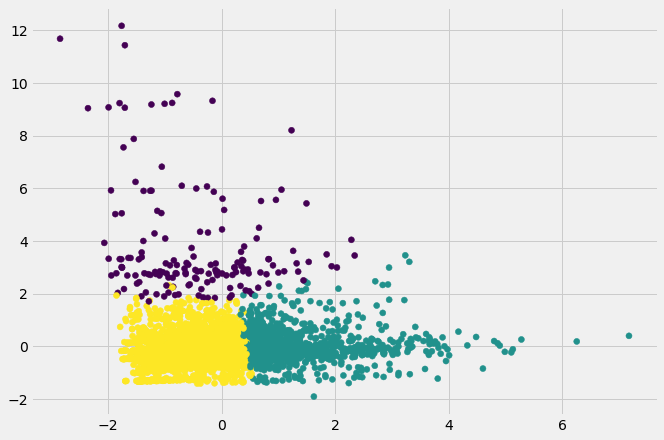

In [50]:
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

pca = decomposition.PCA(n_components=2, whiten=True)

city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]

plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')
plt.show()

In [38]:
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558,2,0.119105,-0.515901
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558,0,0.951140,-0.138827
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558,0,3.856179,-0.285922
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558,0,1.065450,-0.085451
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558,2,0.457189,-0.527191


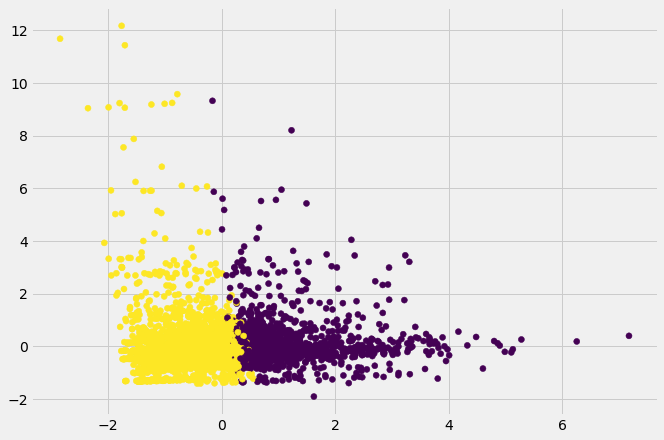

In [39]:
km = cluster.KMeans(n_clusters=2, max_iter=300, random_state=None)

city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

pca = decomposition.PCA(n_components=2, whiten=True)

city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]

plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')
plt.show()

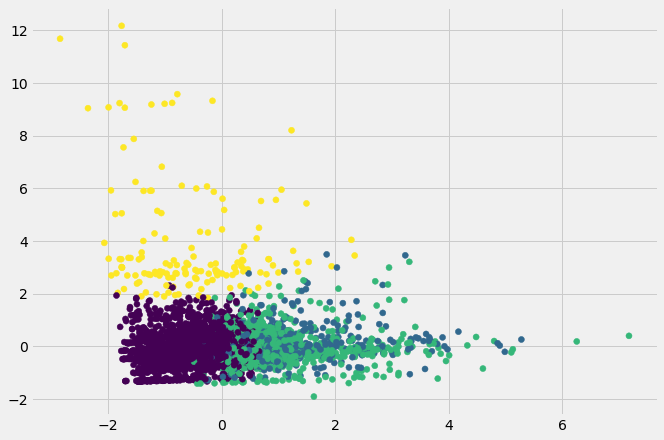

In [40]:
km = cluster.KMeans(n_clusters=4, max_iter=300, random_state=None)

city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

pca = decomposition.PCA(n_components=2, whiten=True)

city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')
plt.show()

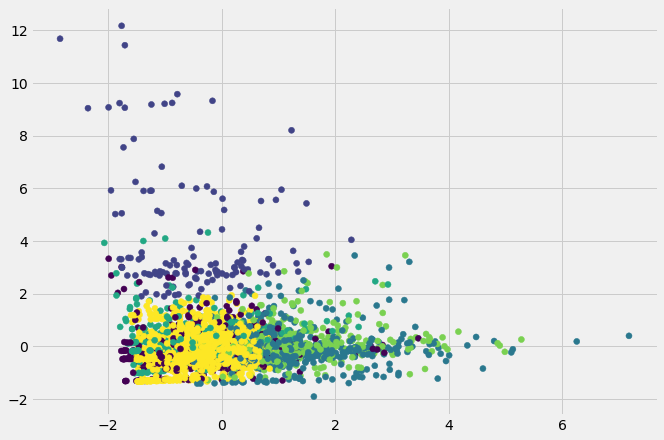

In [41]:
km = cluster.KMeans(n_clusters=6, max_iter=300, random_state=None)

city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

pca = decomposition.PCA(n_components=2, whiten=True)

city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')
plt.show()

# Let's attempt to use the Elbow Method

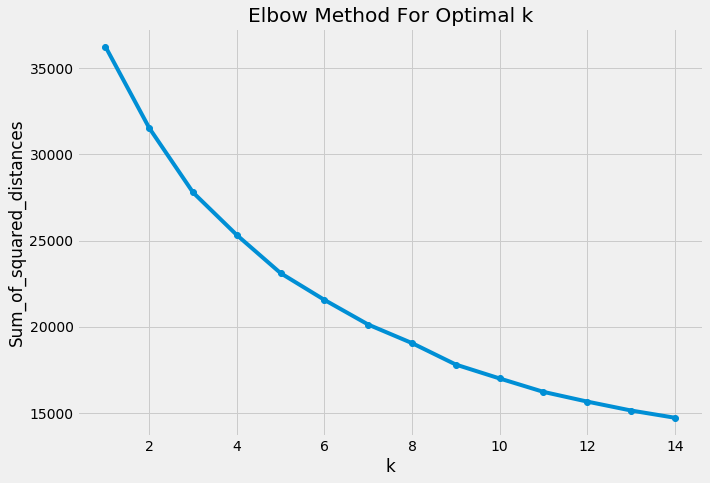

In [42]:
Sum_of_squared_distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(city_groups_std[features_to_explore])
    
    Sum_of_squared_distances.append(km.inertia_)


plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Let's try to use the Silhouette Coefficient

In [43]:
for n_cluster in range(2, 11):
    
    kmeans = KMeans(n_clusters=n_cluster).fit(city_groups_std[features_to_explore])
    
    label = kmeans.labels_
    
    sil_coeff = silhouette_score(city_groups_std[features_to_explore], label, metric='euclidean')
    
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.2325119240341448
For n_clusters=3, The Silhouette Coefficient is 0.27025848008371306
For n_clusters=4, The Silhouette Coefficient is 0.25269652808617465
For n_clusters=5, The Silhouette Coefficient is 0.26124545424941736
For n_clusters=6, The Silhouette Coefficient is 0.26333445326648675
For n_clusters=7, The Silhouette Coefficient is 0.1595141011006514
For n_clusters=8, The Silhouette Coefficient is 0.16820258722324968
For n_clusters=9, The Silhouette Coefficient is 0.17097235132846605
For n_clusters=10, The Silhouette Coefficient is 0.17422733050597924


# Let's stick with K=3

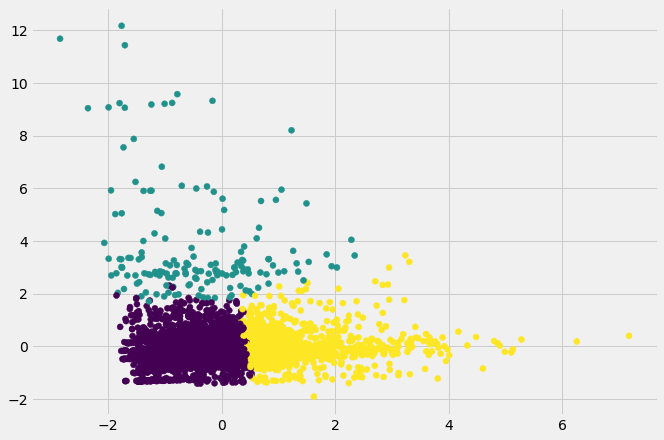

In [44]:
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(city_groups[features_to_explore])
city_groups_std['x'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[features_to_explore])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])

plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')
plt.show()

* Merging the dataframes based on the column user_location_city

In [45]:
city_groups.merge(city_groups_std[['user_location_city', 'cluster']]).groupby('cluster').mean() # for every column

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,28043.901769,2.755301,41.153148,1346.973372,0.143607,0.177969,1.983001,0.366946,1.072532
1,30907.850932,3.042961,55.256884,1540.887311,0.136077,0.187474,4.189130,0.562474,2.447412
2,28977.750916,5.270582,102.111364,3182.495703,0.108719,0.480355,2.013000,0.323064,1.068198


In [46]:
city_groups_std.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,cluster,x,y
0,0,-0.660175,0.478134,0.322823,-0.596460,-0.003914,-0.484763,-0.678042,-0.325558,0,0.119105,-0.515901
1,3,0.573092,0.774885,1.089608,-0.320181,-0.003914,-0.199493,0.255082,-0.325558,2,0.951140,-0.138827
2,7,5.115126,0.035705,2.608569,-0.596460,2.476215,-0.104403,-0.678042,-0.325558,2,3.856179,-0.285922
3,14,1.746200,-0.444493,2.203459,-0.596460,-0.830623,-0.104403,0.721644,-0.325558,2,1.065450,-0.085451
4,21,0.783650,-0.536216,0.229587,-0.596460,0.822796,-0.865123,1.188206,-0.325558,0,0.457189,-0.527191


In [47]:
city_groups_std['cluster'].unique()

array([0, 2, 1], dtype=int64)

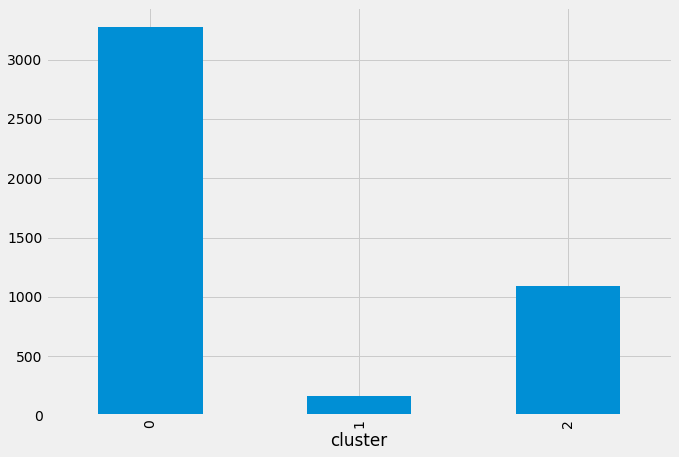

In [48]:
city_groups_std.groupby('cluster')['user_location_city'].agg('count').plot(kind='bar')

In [49]:
city_groups_std[features_to_explore].shape

(4531, 8)